In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/local_security

/content/drive/.shortcut-targets-by-id/11qKrzBEk9pJAvMvITTX7pl2wPXRE4w-Q/local_security


# install, import requirements

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
pd.set_option('mode.chained_assignment',  None) # 경고를 끈다
pd.set_option('display.max_columns', None) # 모든 열 출력
pd.set_option('display.max_rows', None)

In [ ]:
!apt-get update
!apt-get install -y cuda-libraries-dev-9-2
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [994 kB]
Get:14 http://archi

In [ ]:
!pip uninstall -y typing # this should avoid  AttributeError: type object 'Callable' has no attribute '_abc_registry'

!pip install  "git+https://github.com/dreamquark-ai/tabnet.git@develop#egg=pytorch_tabnet" --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/dreamquark-ai/tabnet.git (to revision develop) to /tmp/pip-install-cdxcmhe6/pytorch-tabnet_add084043e8b42388d9de2193c68039a
  Running command git clone --filter=blob:none --quiet https://github.com/dreamquark-ai/tabnet.git /tmp/pip-install-cdxcmhe6/pytorch-tabnet_add084043e8b42388d9de2193c68039a
  Resolved https://github.com/dreamquark-ai/tabnet.git to commit bcae5f43b89fb2c53a0fe8be7c218a7b91afac96
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pytorch_tabnet: filename=pytorch_tabnet-4.0-py3-none-any.whl size=43913 sha256=80d4ebb848f5136f60561290793f82c08f5f962b595ad8e170bc266363ca3623
  Stored in directory: /tmp/pip-ephem-wheel-cache-rq4_t_7v/wheels/33/ec/90/ae88ee166d5a2eabee63ae802d0a6cb752cf7d25a6a8613941
Successfully built pytorch_tabnet


In [ ]:
# import library
!pip install pytorch_tabnet wget

from pytorch_tabnet.tab_model import TabNetRegressor

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_squared_log_error

import pandas as pd
import numpy as np
np.random.seed(0)


import os
import wget
from pathlib import Path


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b3362534e0e33ed316047ff61374acb39f5cd05b52606c1552ac5ff07da23ebd
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import torch
print(torch.cuda.is_available())

True


# load dataset

In [ ]:
X_train = pd.read_csv('data/train/train_x.csv', encoding='cp949')
y_train = pd.read_csv('data/train/train_y.csv', encoding='cp949')
X_test = pd.read_csv('data/train/test_x.csv', encoding='cp949')
y_test = pd.read_csv('data/train/test_y.csv', encoding='cp949')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
y_train['EPDO'].nunique()

33

# modeling

In [ ]:
max_epochs = 50 if not os.getenv("CI", False) else 2

In [ ]:
from pytorch_tabnet.augmentations import RegressionSMOTE
aug = RegressionSMOTE(p=0.2)

In [ ]:
#@title just fitting
clf = TabNetRegressor(
    n_steps=5,
    n_independent=3,
    n_shared=3
)

/usr/local/lib/python3.8/dist-packages/pytorch_tabnet/abstract_model.py:80: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['rmsle', 'rmse', 'mse'],
    max_epochs=max_epochs,
    patience=40,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    augmentations=aug, #aug
)

epoch 0  | loss: 8.02617 | train_rmsle: 0.16387 | train_rmse: 2.35978 | train_mse: 5.56858 | valid_rmsle: 0.16143 | valid_rmse: 2.26491 | valid_mse: 5.12982 |  0:00:05s
epoch 1  | loss: 5.23428 | train_rmsle: 0.16032 | train_rmse: 2.38362 | train_mse: 5.68167 | valid_rmsle: 0.15799 | valid_rmse: 2.28853 | valid_mse: 5.23738 |  0:00:10s
epoch 2  | loss: 5.19655 | train_rmsle: 0.16335 | train_rmse: 2.33908 | train_mse: 5.47128 | valid_rmsle: 0.16211 | valid_rmse: 2.24829 | valid_mse: 5.05481 |  0:00:16s
epoch 3  | loss: 5.1922  | train_rmsle: 0.16449 | train_rmse: 2.33492 | train_mse: 5.45184 | valid_rmsle: 0.16327 | valid_rmse: 2.24456 | valid_mse: 5.03806 |  0:00:21s
epoch 4  | loss: 5.15565 | train_rmsle: 0.16371 | train_rmse: 2.34441 | train_mse: 5.49627 | valid_rmsle: 0.16307 | valid_rmse: 2.25963 | valid_mse: 5.10592 |  0:00:27s
epoch 5  | loss: 5.18365 | train_rmsle: 0.16339 | train_rmse: 2.33681 | train_mse: 5.46068 | valid_rmsle: 0.16206 | valid_rmse: 2.24684 | valid_mse: 5.0483

/usr/local/lib/python3.8/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
#@title using grid search
from sklearn.model_selection import GridSearchCV

clf = TabNetRegressor()

# Define the hyperparameters to be tuned
param_grid = {
    'n_steps': [4],
    'n_independent': [1, 2, 3],
    'n_shared': [1, 2, 3],
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train.values, y_train.values,
    eval_set=[(X_train.values, y_train.values)],
    eval_name=['train'],
    eval_metric=['rmsle', 'rmse', 'mse'],
    max_epochs=max_epochs,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    augmentations=aug
)

print("Best parameters found: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)

# results

In [ ]:
"""
n_steps=5
n_independent=3
n_shared=3
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.960016820176998
MSE for TabNet : 5.1405562639769755
RMSE for TabNet : 2.267279485192987
RMSLE for TabNet : 0.3950136503007026


In [ ]:
"""
n_steps=1
n_independent=2
n_shared=2
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.963596775220496
MSE for TabNet : 5.147554973450764
RMSE for TabNet : 2.2688223759145987
RMSLE for TabNet : 0.397196281153093


In [ ]:
"""
n_steps=2
n_independent=2
n_shared=2
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.960671642989316
MSE for TabNet : 5.133559768296794
RMSE for TabNet : 2.2657360323516933
RMSLE for TabNet : 0.3992160651236182


In [ ]:
"""
n_steps=6
n_independent=2
n_shared=2
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.991304689699169
MSE for TabNet : 5.200051259626943
RMSE for TabNet : 2.280362089587297
RMSLE for TabNet : 0.3999669131385666


In [ ]:
"""
n_steps=4
n_independent=3
n_shared=3
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.9629426920927715
MSE for TabNet : 5.198989293928235
RMSE for TabNet : 2.28012922746239
RMSLE for TabNet : 0.3997397316057616


In [ ]:
"""
n_steps=4
n_independent=2
n_shared=3
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.947110342775195
MSE for TabNet : 5.135987079189888
RMSE for TabNet : 2.2662716252007145
RMSLE for TabNet : 0.39825107460119713


In [ ]:
"""
n_steps=4
n_independent=1
n_shared=3
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.963536902721184
MSE for TabNet : 5.160190512937048
RMSE for TabNet : 2.2716052722550737
RMSLE for TabNet : 0.3952849859290564


In [ ]:
"""
n_steps=4
n_independent=3
n_shared=2
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.951550868586044
MSE for TabNet : 5.140466381470065
RMSE for TabNet : 2.2672596634417648
RMSLE for TabNet : 0.397263969162484


In [ ]:
"""
n_steps=4
n_independent=1
n_shared=2
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.95894836920275
MSE for TabNet : 5.171732959968524
RMSE for TabNet : 2.274144445713272
RMSLE for TabNet : 0.39749284925038714


In [ ]:
"""
n_steps=4
n_independent=3
n_shared=1
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.965175869438837
MSE for TabNet : 5.177393451118745
RMSE for TabNet : 2.275388637380161
RMSLE for TabNet : 0.3962683539317781


In [ ]:
"""
n_steps=4
n_independent=2
n_shared=1
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.95349653107091
MSE for TabNet : 5.139077984557105
RMSE for TabNet : 2.266953458842308
RMSLE for TabNet : 0.3978286281786114


In [ ]:
"""
n_steps=4
n_independent=1
n_shared=1
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.958079927599146
MSE for TabNet : 5.167384318916802
RMSE for TabNet : 2.2731881397976723
RMSLE for TabNet : 0.39821799140843894


In [ ]:
"""
n_steps=5
n_independent=2
n_shared=2
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {mse}")
print(f"RMSE for TabNet : {mse**0.5}")
print(f"RMSLE for TabNet : {msle**0.5}")

BEST VALID SCORE for TabNet : 4.946028784205986
MSE for TabNet : 5.179922243122414
RMSE for TabNet : 2.275944253078799
RMSLE for TabNet : 0.39741437001982194


In [ ]:
"""
n_steps=4
n_independent=2
n_shared=2
*best
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

test_score = mean_squared_error(y_pred=preds, y_true=y_true)
mean_squared_log_error = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE for TabNet : {clf.best_cost}")
print(f"MSE for TabNet : {test_score}")
print(f"RMSE for TabNet : {test_score**0.5}")
print(f"RMSLE for TabNet : {mean_squared_log_error**0.5}")

BEST VALID SCORE FOR taas : 4.96067230537247
FINAL TEST MSE FOR taas : 5.133897837897719
FINAL TEST RMSE FOR taas : 2.2658106359309285
FINAL TEST RMSLE FOR taas : 0.3976426892837124


In [ ]:
"""
n_steps=3
n_independent=2
n_shared=2
"""
preds = clf.predict(X_test.values)

y_true = y_test.values

mse = mean_squared_error(y_pred=preds, y_true=y_true)
msle = mean_squared_log_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE FOR taas : {clf.best_cost}")
print(f"FINAL TEST MSE FOR taas : {mse}")
print(f"FINAL TEST RMSE FOR taas : {mse**0.5}")
print(f"FINAL TEST RMSLE FOR taas : {msle**0.5}")

BEST VALID SCORE FOR taas : 4.9651736932241635
FINAL TEST MSE FOR taas : 5.1619567340832235
FINAL TEST RMSE FOR taas : 2.2719939995702507
FINAL TEST RMSLE FOR taas : 0.3985704575184767


# check explainability

In [ ]:
#@title global explainability
clf.feature_importances_

array([1.34391675e-01, 0.00000000e+00, 0.00000000e+00, 7.01339090e-02,
       0.00000000e+00, 0.00000000e+00, 2.54564782e-02, 1.81864111e-02,
       3.36085103e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.35186503e-01, 0.00000000e+00, 1.99693977e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.07106123e-02,
       8.56674419e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.63057332e-02, 0.00000000e+00, 1.95588955e-06,
       6.90006600e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00464673e-07, 2.20980051e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.93125874e-08,
       0.00000000e+00, 4.82561197e-03, 0.00000000e+00, 0.00000000e+00,
       1.07328303e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.61722620e-02, 0.00000000e+00, 0.00000000e+00, 2.88470870e-02,
      

In [ ]:
#@title local explainability and masks
explain_matrix, masks = clf.explain(X_test.values)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
len(masks)

5

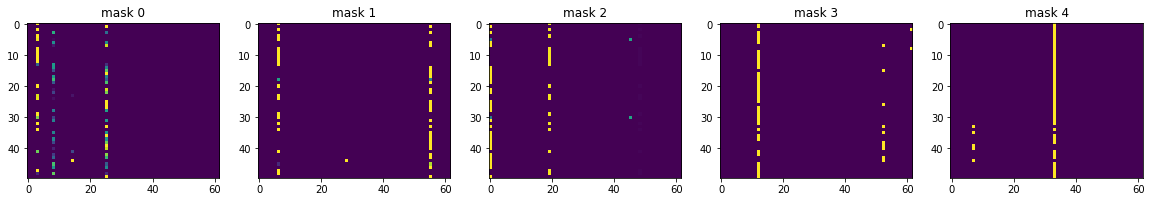

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(0, len(masks)):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

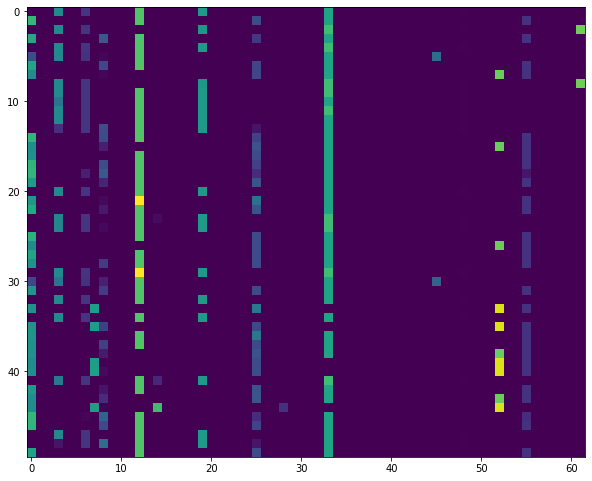

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(explain_matrix[:50])

In [ ]:
import numpy as np

# Compute the mean of each column in the explain_matrix
column_means = np.mean(explain_matrix, axis=0)

# Get the indices of the top 30 columns with the highest average value
top_30_indices = np.argsort(-column_means)[:30]

# Get the values of the top 30 columns
top_30_values = column_means[top_30_indices]

In [ ]:
dic = {}
for key, value in zip(features, column_means):
  dic[key] = value

print(dic)

{'이륜차': 0.00013908638356440684, '인구': 0.15997313197410273, '기온': 0.0, '강수량': 0.0, '풍속': 0.0, '단속카메라수': 0.009725169145167712, '제한속도': 0.0, '음식점수': 0.0, '사고일시_새벽': 0.6750567984181173, '사고일시_오후': 0.0, '사고일시_저녁': 0.13968297204582605, '사고일시_점심': 0.0, '사고일시_출근': 0.005932710474476124, '사고일시_퇴근': 0.0, '요일_금요일': 0.01786841627260119, '요일_목요일': 0.0, '요일_수요일': 0.0, '요일_월요일': 0.0, '요일_일요일': 0.0, '요일_토요일': 0.0, '요일_화요일': 0.0, '사고유형_차대사람': 0.0, '사고유형_차대차': 0.0, '사고유형_차량단독': 0.0, '법규위반_과속': 0.0, '법규위반_교차로운행방법위반': 0.7928391088504483, '법규위반_기타': 1.0222196578979492e-05, '법규위반_보행자보호의무위반': 0.0, '법규위반_불법유턴': 0.0, '법규위반_신호위반': 3.300766511861489, '법규위반_안전거리미확보': 0.0, '법규위반_안전운전불이행': 0.8046764198976005, '법규위반_중앙선침범': 0.0006284348075019584, '법규위반_직진우회전진행방해': 0.0005195245555145843, '법규위반_차로위반': 0.0, '노면상태_건조': 0.5040355453243806, '노면상태_기타': 0.0, '노면상태_서리/결빙': 0.8706623736294627, '노면상태_적설': 0.0, '노면상태_젖음/습기': 0.1575265815877503, '노면상태_침수': 0.009780922855197525, '노면상태_해빙': 0.0, '도로형태_교차로 - 교차로부근': 0.0, '도로형태_교차로 -

In [ ]:
sorted_dic = sorted(dic.items(), reverse=True, key=lambda item: item[1])
sorted_dic

[('법규위반_신호위반', 3.300766511861489),
 ('가해운전자 연령_노년', 1.6250290469733117),
 ('가해운전자 연령_장년', 1.5436545499742902),
 ('도로형태_단일로 - 터널', 1.2281499687112338),
 ('노면상태_서리/결빙', 0.8706623736294627),
 ('도로형태_단일로 - 기타', 0.8513545702009264),
 ('법규위반_안전운전불이행', 0.8046764198976005),
 ('법규위반_교차로운행방법위반', 0.7928391088504483),
 ('사고일시_새벽', 0.6750567984181173),
 ('노면상태_건조', 0.5040355453243806),
 ('가해운전자 연령_청년', 0.4903773608475207),
 ('인구', 0.15997313197410273),
 ('노면상태_젖음/습기', 0.1575265815877503),
 ('사고일시_저녁', 0.13968297204582605),
 ('도로형태_단일로 - 교량', 0.02401372573049824),
 ('요일_금요일', 0.01786841627260119),
 ('노면상태_침수', 0.009780922855197525),
 ('단속카메라수', 0.009725169145167712),
 ('가해운전자 연령_청소년', 0.0060131207307459016),
 ('사고일시_출근', 0.005932710474476124),
 ('도로형태_단일로 - 고가도로위', 0.0007536288138769582),
 ('법규위반_중앙선침범', 0.0006284348075019584),
 ('법규위반_직진우회전진행방해', 0.0005195245555145843),
 ('도로형태_교차로 - 교차로횡단보도내', 0.0004594898609233757),
 ('이륜차', 0.00013908638356440684),
 ('도로형태_주차장 - 주차장', 2.9237931744782587e-05),
 (

In [ ]:
columns = ['변수', '작용값']
dic_df = pd.DataFrame(sorted_dic, columns=columns)

dic_df

,변수,작용값
0,법규위반_신호위반,3.300767
1,가해운전자 연령_노년,1.625029
2,가해운전자 연령_장년,1.543655
3,도로형태_단일로 - 터널,1.228150
4,노면상태_서리/결빙,0.870662
5,도로형태_단일로 - 기타,0.851355
6,법규위반_안전운전불이행,0.804676
7,법규위반_교차로운행방법위반,0.792839
8,사고일시_새벽,0.675057
9,노면상태_건조,0.504036


In [ ]:
dic_df.iloc[:27]

,변수,작용값
0,법규위반_신호위반,3.300767
1,가해운전자 연령_노년,1.625029
2,가해운전자 연령_장년,1.543655
3,도로형태_단일로 - 터널,1.228150
4,노면상태_서리/결빙,0.870662
5,도로형태_단일로 - 기타,0.851355
6,법규위반_안전운전불이행,0.804676
7,법규위반_교차로운행방법위반,0.792839
8,사고일시_새벽,0.675057
9,노면상태_건조,0.504036


# 변수 중요도

In [ ]:
%pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.2 MB/s eta 0:00:00


In [ ]:
import shap

explainer = shap.Explainer(clf.predict, X_train.values)
shap_values = explainer(X_test.values)

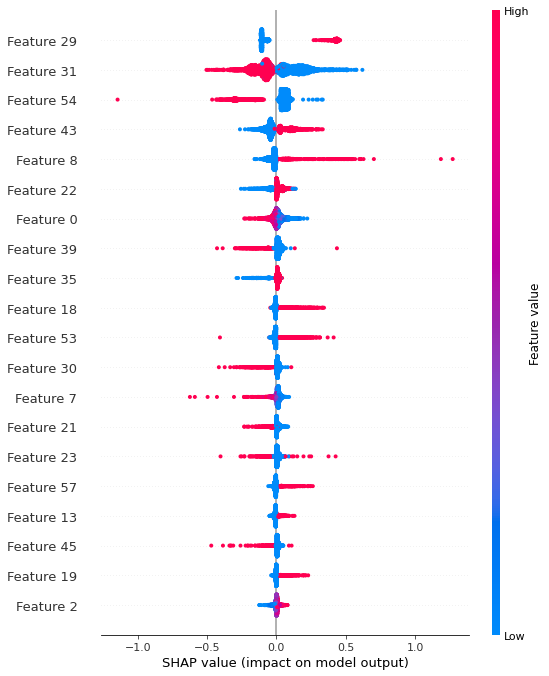

In [ ]:
shap.summary_plot(shap_values, X_test.values)

In [ ]:
feature_names = X_train.columns

rf_resultX = pd.DataFrame(shap_values.values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
29,법규위반_신호위반,0.174296
31,법규위반_안전운전불이행,0.135145
54,가해운전자 연령_장년,0.090590
43,도로형태_교차로 - 교차로안,0.065533
8,사고일시_새벽,0.043994
22,사고유형_차대차,0.030216
0,이륜차,0.028990
39,노면상태_젖음/습기,0.025410
35,노면상태_건조,0.021200
18,요일_일요일,0.020861
